# 01-NBS Data Exploration

## Purpose

This notebook has the purpose to make some data exploration in the train/validation/test dataset and understand the features present in the dataset

## Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import fireducks.pandas as pd

## Load Train Dataset

In [3]:
train_df = pd.read_csv("../data/01_raw/jigsaw-toxic-comment-train.csv")
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [4]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
print("Missing values: ")
train_df.isnull().sum()

Missing values: 


id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
print("Feature distribution: ")
train_df.describe()

Feature distribution: 


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Univariate Analysis

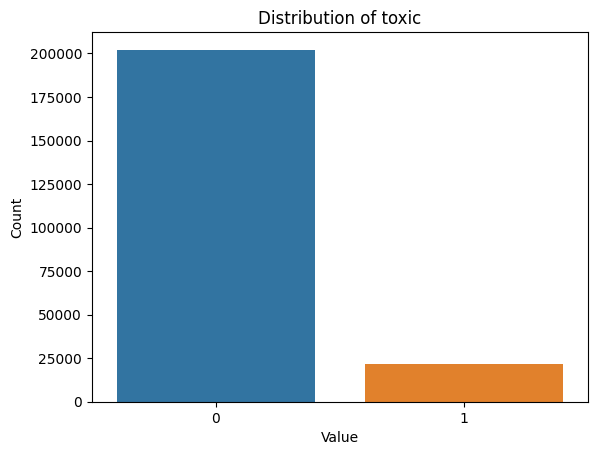

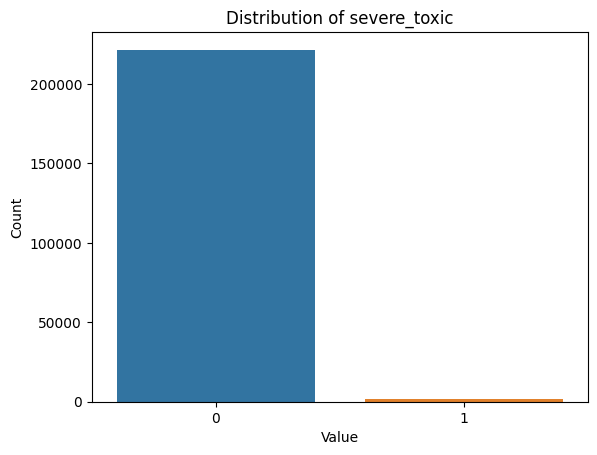

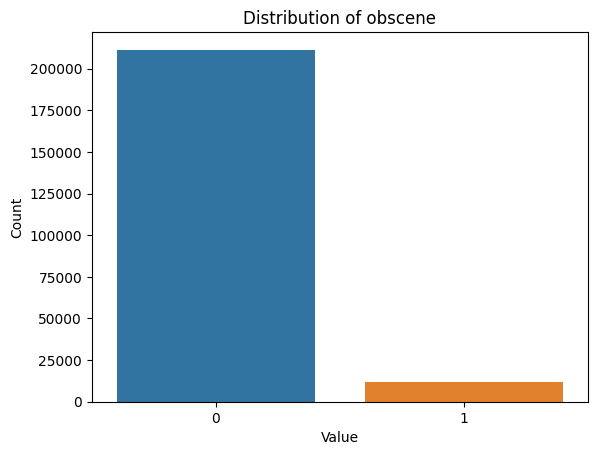

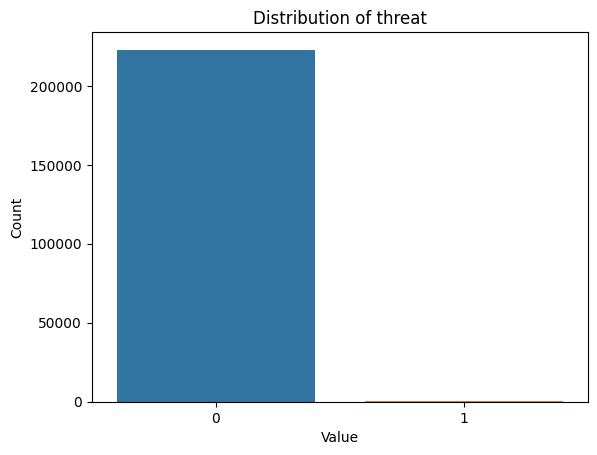

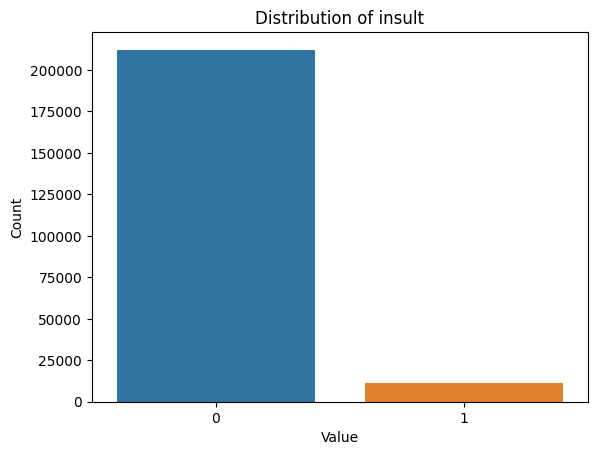

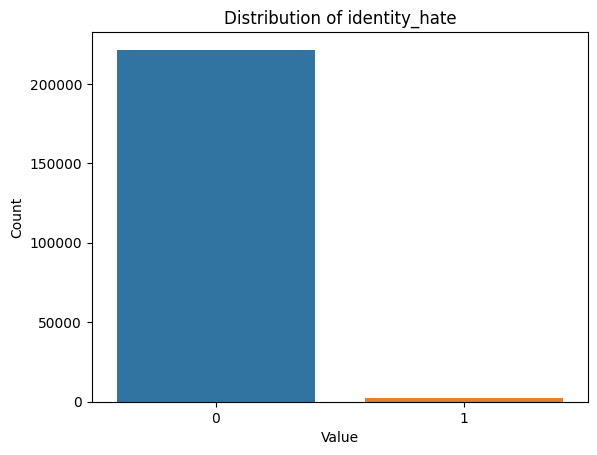

In [16]:
for feature in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    sns.countplot(x=train_df[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()

### Mutivariate Analysis (Correlation heatmap & Pairwise joint occurences)

Text(0.5, 1.0, 'Correlation Heatmap')

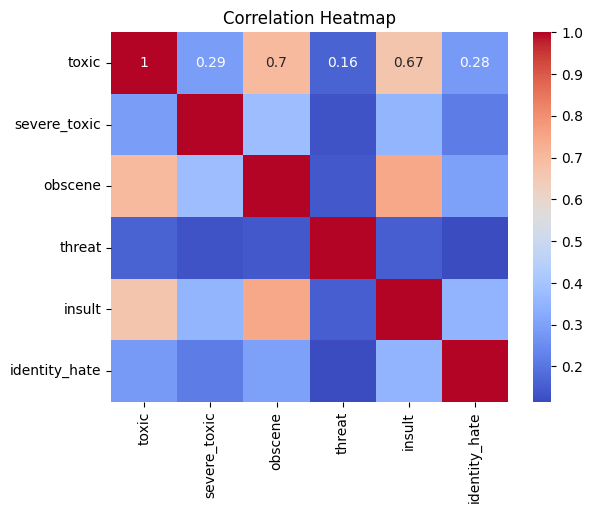

In [ ]:
correlation_matrix = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

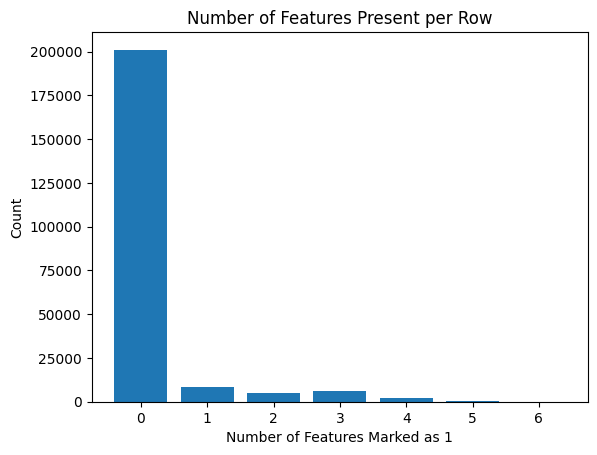

In [13]:
combinations = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1).value_counts()
combinations.sort_index(inplace=True)
plt.bar(combinations.index, combinations.values)
plt.title("Number of Features Present per Row")
plt.xlabel("Number of Features Marked as 1")
plt.ylabel("Count")
plt.show()

### Pairwise Relationships

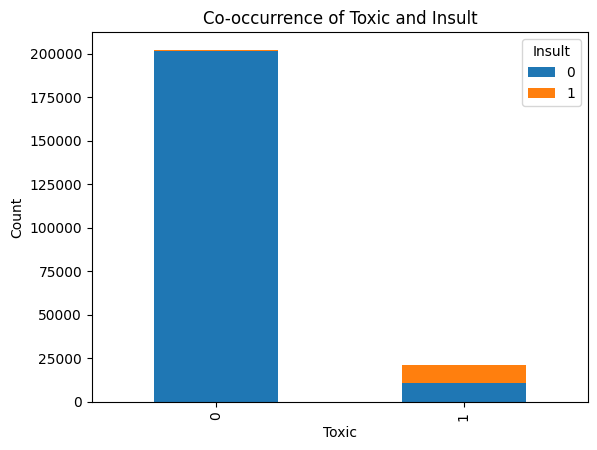

In [14]:
pd.crosstab(train_df["toxic"], train_df["insult"]).plot(kind="bar", stacked=True)
plt.title("Co-occurrence of Toxic and Insult")
plt.xlabel("Toxic")
plt.ylabel("Count")
plt.legend(title="Insult", loc="upper right")
plt.show()

### Insights and Observations

- There a patner of imballenced ``toxic/severe_toxic/obscene/threat/insult/identity_hate`` comment related to normal comments. 
- For correlation Heatmap we have that:
    - `toxic` samples has 29% of positive correlation related to `severe_toxic`;
    - `toxic` samples has 70% of positive correlation related to `obscene` categorie;
    - `toxic` samples has 16% of positive correlation (almost null correlation) related to `threat` categorie;
    - `toxic` samples has 67% of positive correlation related to `insult` categorie;
    - `toxic` samples has 28% of positive correlation related to `identity_hate` categorie.

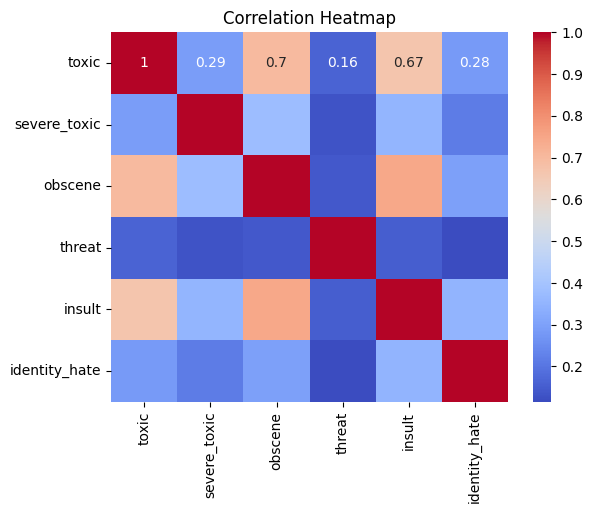